In [1]:
# Note: This was copied from https://github.com/fwillett/handwritingBCI/blob/main/Step1_timeWarp.ipynb.

#This notebook performs Step 1 of the RNN training process: time-warping the single letter data so that it
#can be used to initialize the data-labeling HMM. Running this notebook will (slowly) time-warp all 10 sessions
#and save the results in Step1_TimeWarping folder.

#To run this notebook, you'll need the time warped PCA python package (https://github.com/ganguli-lab/twpca).

In [2]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

#suppress all tensorflow warnings (largely related to compatability with v2)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from IPython.display import display
import os
import numpy as np
import scipy.io
import scipy.ndimage.filters
import matplotlib.pyplot as plt
from twpca import TWPCA
from twpca.regularizers import curvature

#point this towards the top level dataset directory
rootDir = os.path.expanduser('~') + '/clones/willets-2021-handwriting-bci'

#this line ensures that tensorflow will only use GPU 0 (keeps it from taking over all the GPUs in a multi-gpu setup)
# os.environ["CUDA_VISIBLE_DEVICES"]='0'

#defines all the sessions that will be time-warped
dataDirs = ['t5.2019.05.08']

#saves all time-warped data in this folder
if not os.path.isdir(rootDir + '/warped-data'):
    os.mkdir(rootDir + '/warped-data')

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#--Can add new definitions here to apply this code to other problems or datasets.--
import numpy as np

def getHandwritingCharacterDefinitions():
    """
    Returns a dictionary with entries that define the names of each character, its length, and where the pen tip begins.
    
    Returns:
        charDef (dict)
    """
        
    charDef = {}
    
    #Define the list of all 31 characters and their names.
    charDef['charList'] = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
                'greaterThan','comma','apostrophe','tilde','questionMark']
    charDef['charListAbbr'] = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
                '>',',',"'",'~','?']

    #Define the length of each character (in # of 10 ms bins) to use for each template.
    #These were hand-defined based on visual inspection of the reconstructed pen trajectories.
    charDef['charLen'] = np.array([99, 91, 70, 104, 98, 125, 110, 104, 79, 92, 127, 68, 132, 90, 
                        84, 113, 104, 74, 86, 110, 86, 83, 110, 103, 115, 100, 82, 77, 116, 71, 110]).astype(np.int32)
    
    #For each character, this defines the starting location of the pen tip (0 = bottom of the line, 1 = top)
    charDef['penStart'] = [0.25, 1, 0.5, 0.5, 0.25, 1.0, 0.25, 1.0, 0.5, 0.5, 1, 1, 0.5, 0.5, 0.25, 0.5, 0.25, 0.5, 0.5, 1, 
           0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25, 1, 0.5, 1]
    
    #dictionary to convert string representation to character index
    charDef['strToCharIdx'] = {}
    for x in range(len(charDef['charListAbbr'])):
        charDef['strToCharIdx'][charDef['charListAbbr'][x]] = x
        
    #ordering of characters that kaldi (i.e., the language model) expects
    charDef['kaldiOrder'] = ['<ctc>','>',"'",',','.','?','a','b','c','d','e','f','g','h','i','j',
                             'k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    
    #re-indexing to match kaldi order (e.g., outputs[:,:,charDef['idxToKaldi']] places the output in kald-order)
    charDef['idxToKaldi'] = np.array([31,26,28,27,29,30,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                     21,22,23,24,25]).astype(np.int32)
    
    return charDef

charDef = getHandwritingCharacterDefinitions()

In [4]:
import tarfile
# Path to the tar file and the target file inside it
tar_path = 'handwritingBCIData.tar'
target_mat_path = './handwritingBCIData/Datasets/t5.2019.05.08/singleLetters.mat'

# Open the tar file
with tarfile.open(tar_path, 'r') as tar:
    # Get the file object
    mat_member = tar.getmember(target_mat_path)
    mat_file = tar.extractfile(mat_member)
    
    # Load the .mat file
    if mat_file is not None:
        dat = scipy.io.loadmat(mat_file)

Warping dataset: t5.2019.05.08
Warping character: a


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
I0000 00:00:1750985251.540239 27461005 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-06-26 17:47:31.549240: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale/Assign' id:17 op device:{requested: '', assigned: ''} def:{{{node tau_scale/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale, tau_scale/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a ne

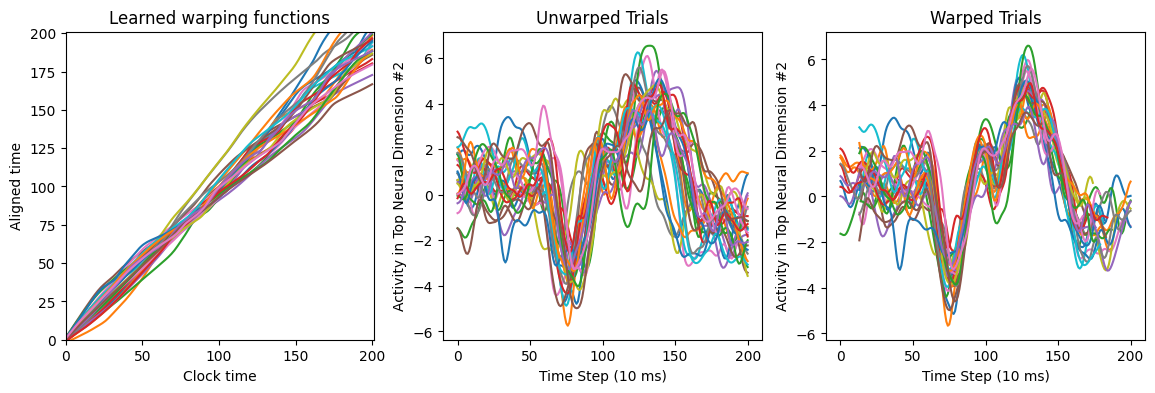

Warping character: b


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:47:48.152644: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_1/Assign' id:25174 op device:{requested: '', assigned: ''} def:{{{node tau_scale_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_1, tau_scale_1/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:47:53.931025: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_1/Adam_1/A

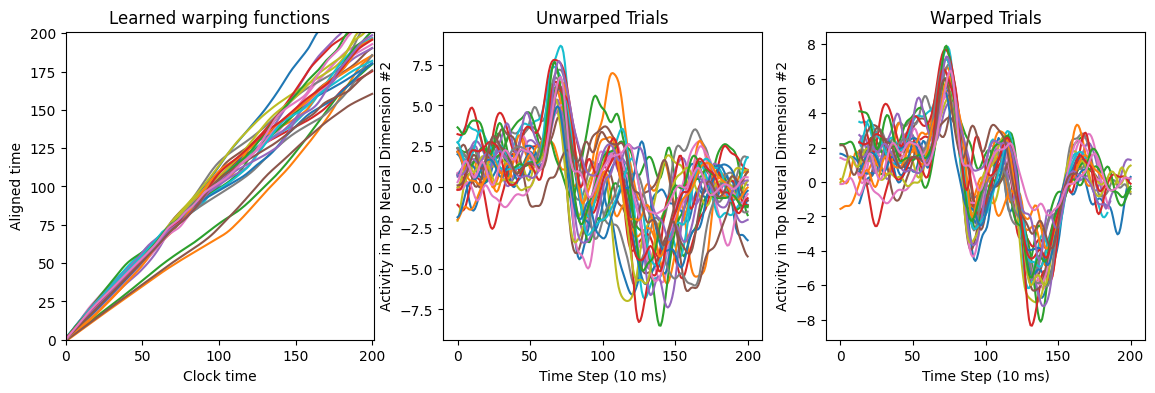

Warping character: c


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:48:11.454848: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_2/Assign' id:50382 op device:{requested: '', assigned: ''} def:{{{node tau_scale_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_2, tau_scale_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:48:17.427589: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_2/Adam_1/A

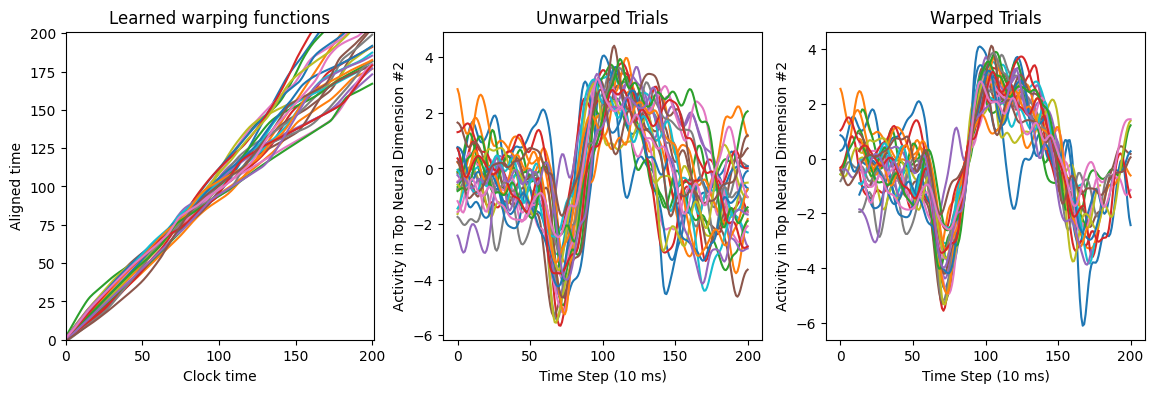

Warping character: d


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:48:38.688481: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_3/Assign' id:75641 op device:{requested: '', assigned: ''} def:{{{node tau_scale_3/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_3, tau_scale_3/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:48:45.976651: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_3/Adam_1/A

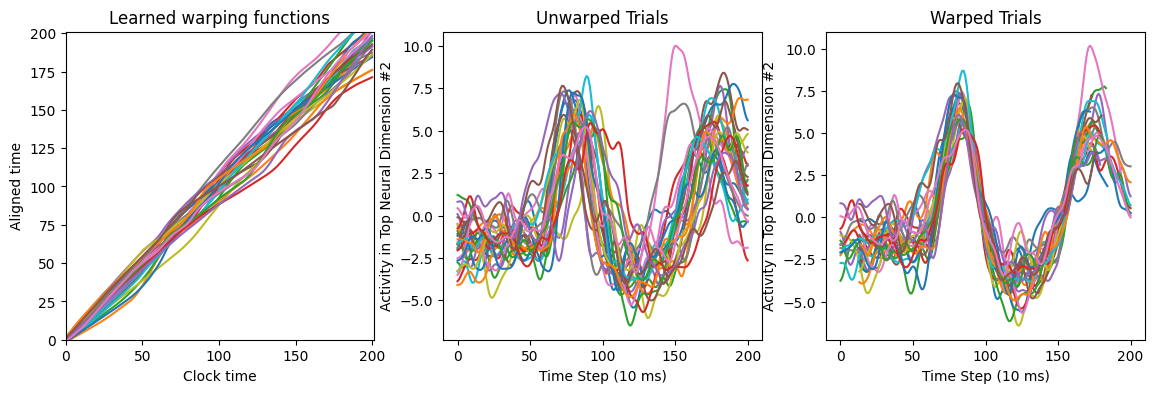

Warping character: e


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:49:09.608004: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_4/Assign' id:100951 op device:{requested: '', assigned: ''} def:{{{node tau_scale_4/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_4, tau_scale_4/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:49:19.043950: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_4/Adam_1/

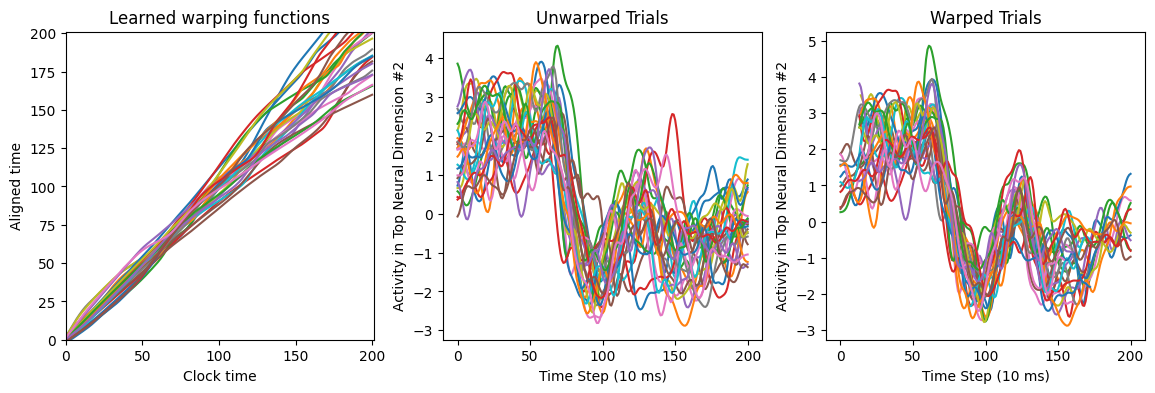

Warping character: f


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:49:45.981635: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_5/Assign' id:126312 op device:{requested: '', assigned: ''} def:{{{node tau_scale_5/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_5, tau_scale_5/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:49:55.610480: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_5/Adam_1/

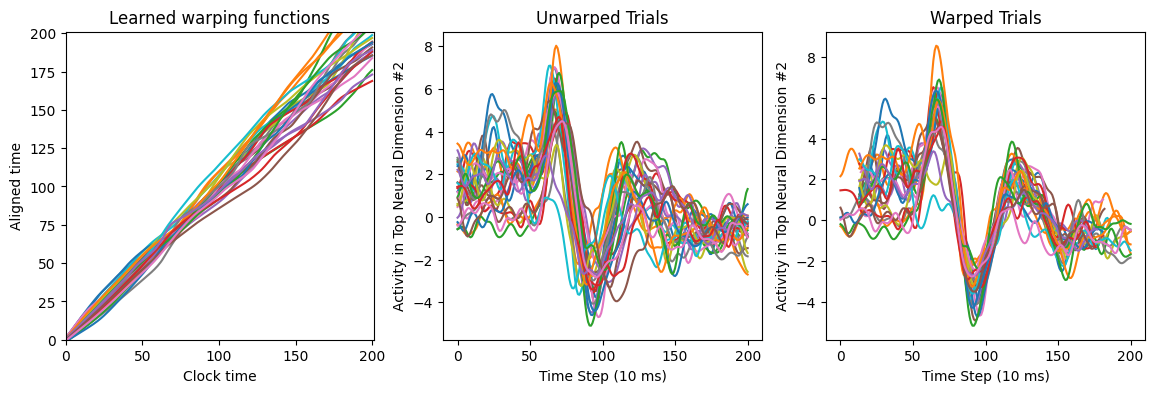

Warping character: g


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:50:23.738562: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_6/Assign' id:151724 op device:{requested: '', assigned: ''} def:{{{node tau_scale_6/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_6, tau_scale_6/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:50:37.346129: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_6/Adam_1/

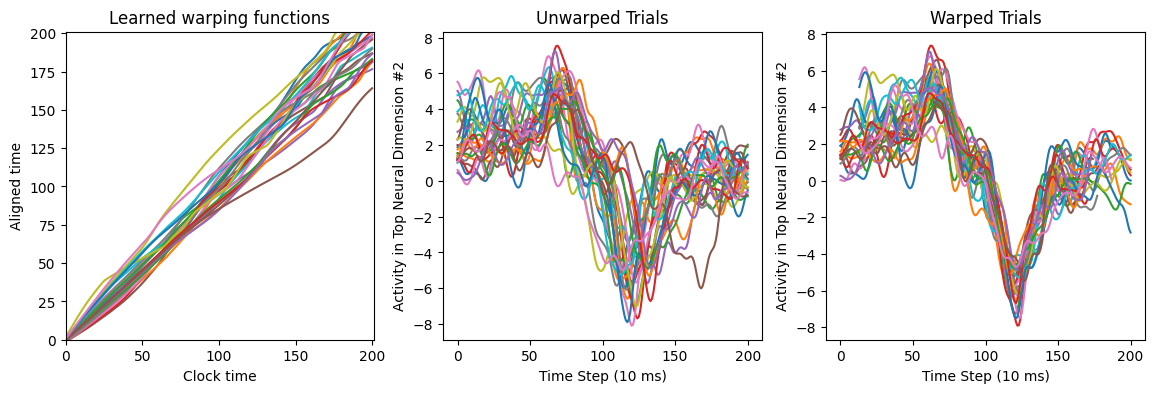

Warping character: h


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:51:08.557760: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_7/Assign' id:177187 op device:{requested: '', assigned: ''} def:{{{node tau_scale_7/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_7, tau_scale_7/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:51:20.076901: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_7/Adam_1/

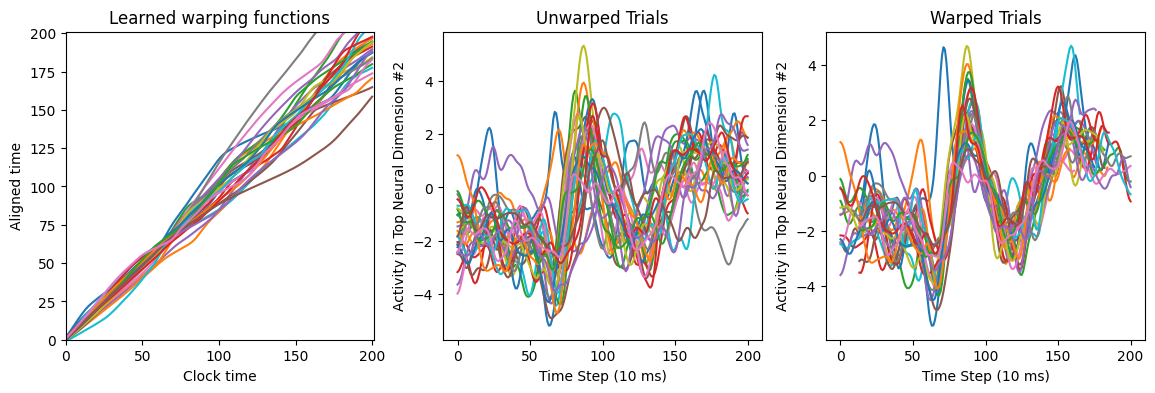

Warping character: i


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:51:57.070034: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_8/Assign' id:202701 op device:{requested: '', assigned: ''} def:{{{node tau_scale_8/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_8, tau_scale_8/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:52:13.337595: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_8/Adam_1/

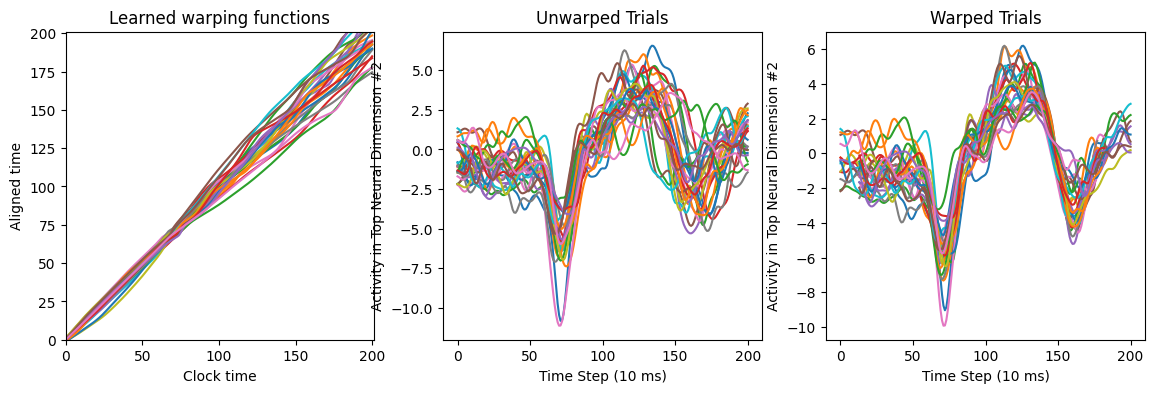

Warping character: j


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:52:53.617115: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_9/Assign' id:228266 op device:{requested: '', assigned: ''} def:{{{node tau_scale_9/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_9, tau_scale_9/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:53:10.235069: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_9/Adam_1/

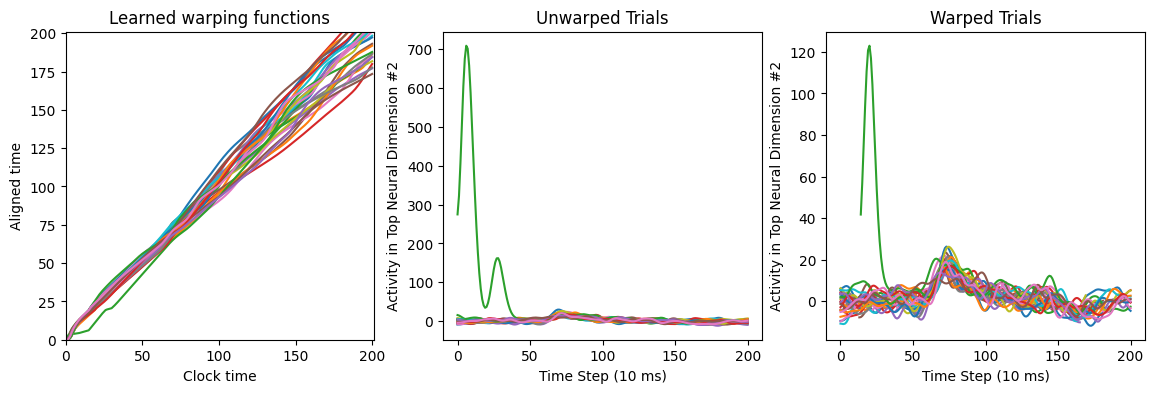

Warping character: k


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:53:54.631770: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_10/Assign' id:253882 op device:{requested: '', assigned: ''} def:{{{node tau_scale_10/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_10, tau_scale_10/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:54:12.833665: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_10/Ad

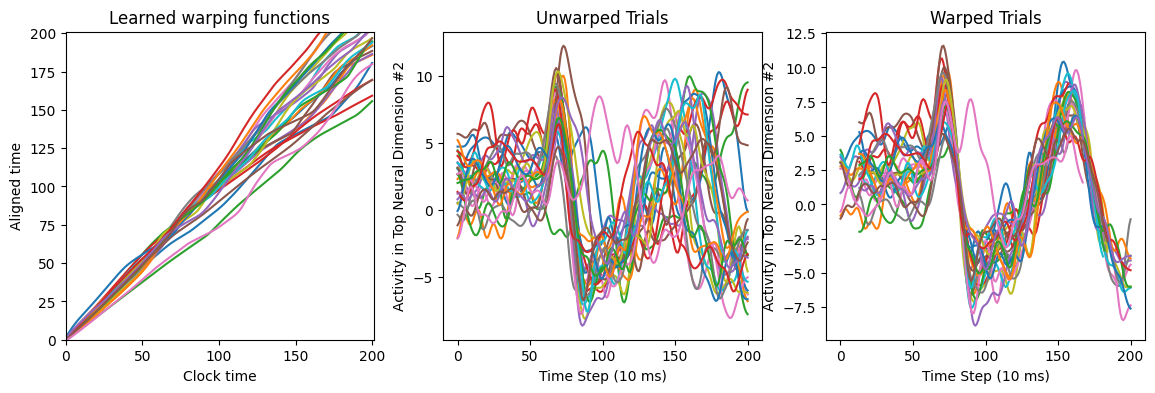

Warping character: l


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:54:56.995763: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_11/Assign' id:279549 op device:{requested: '', assigned: ''} def:{{{node tau_scale_11/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_11, tau_scale_11/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:55:17.374197: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_11/Ad

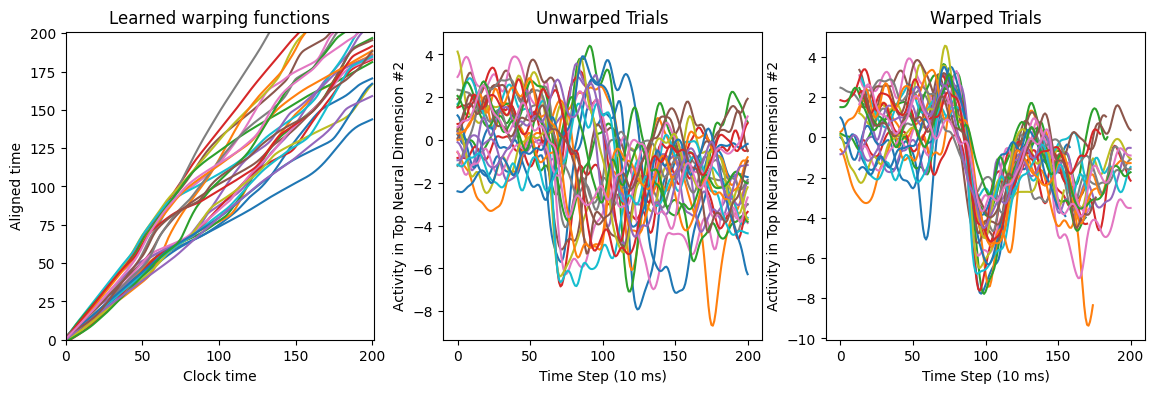

Warping character: m


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:56:16.125916: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_12/Assign' id:305267 op device:{requested: '', assigned: ''} def:{{{node tau_scale_12/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_12, tau_scale_12/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:56:35.427186: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_12/Ad

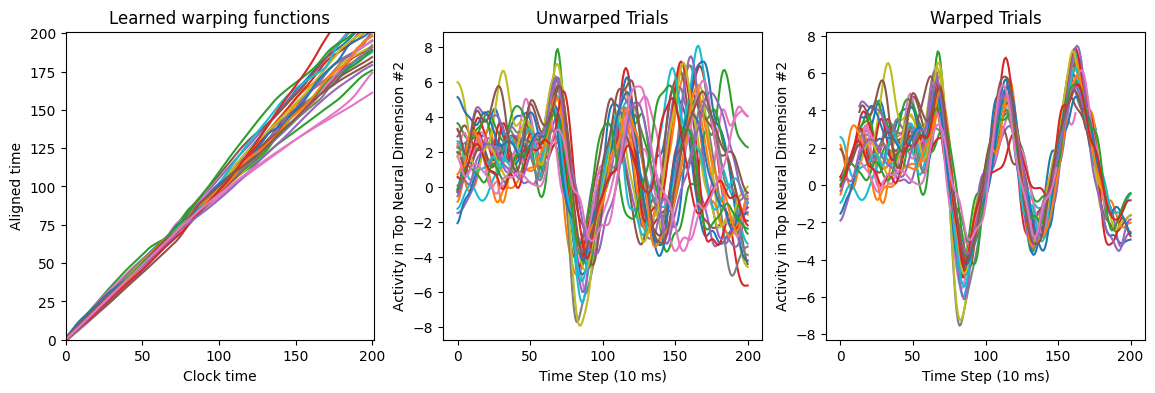

Warping character: n


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:57:21.140640: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_13/Assign' id:331036 op device:{requested: '', assigned: ''} def:{{{node tau_scale_13/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_13, tau_scale_13/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:57:47.120726: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_13/Ad

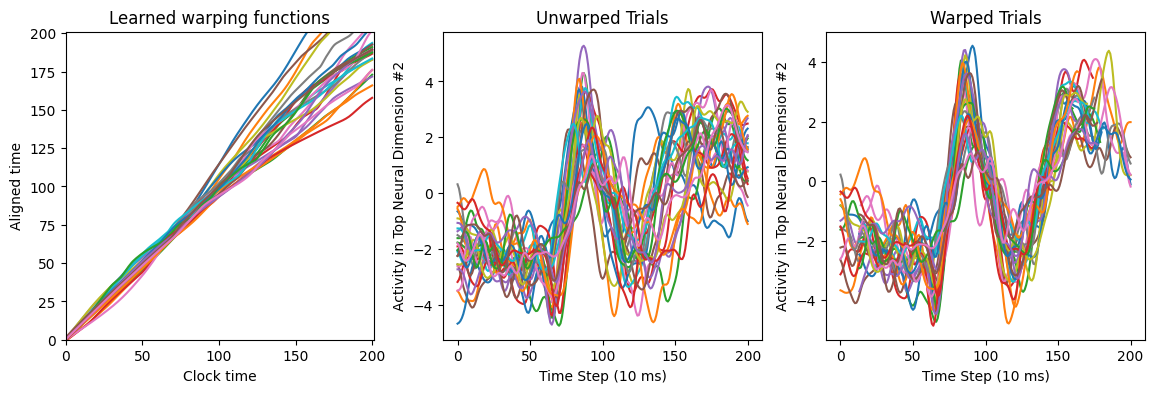

Warping character: o


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:58:37.807921: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_14/Assign' id:356856 op device:{requested: '', assigned: ''} def:{{{node tau_scale_14/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_14, tau_scale_14/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 17:58:59.383112: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_14/Ad

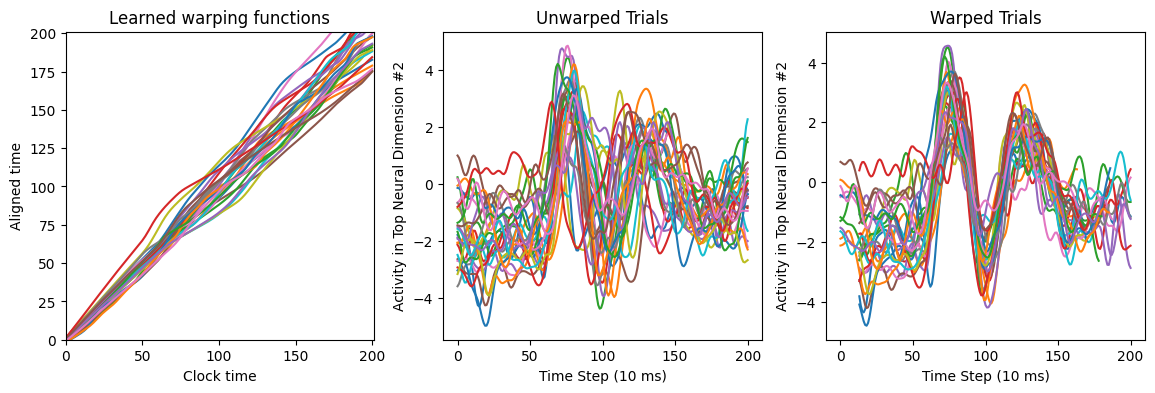

Warping character: p


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 17:59:59.039480: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_15/Assign' id:382727 op device:{requested: '', assigned: ''} def:{{{node tau_scale_15/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_15, tau_scale_15/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:00:24.532558: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_15/Ad

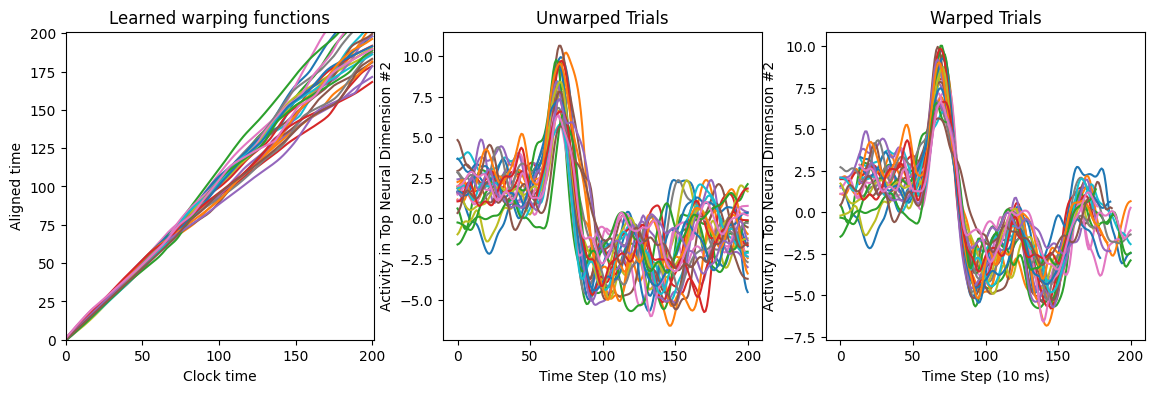

Warping character: q


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:01:48.648042: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_16/Assign' id:408649 op device:{requested: '', assigned: ''} def:{{{node tau_scale_16/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_16, tau_scale_16/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:02:23.728298: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_16/Ad

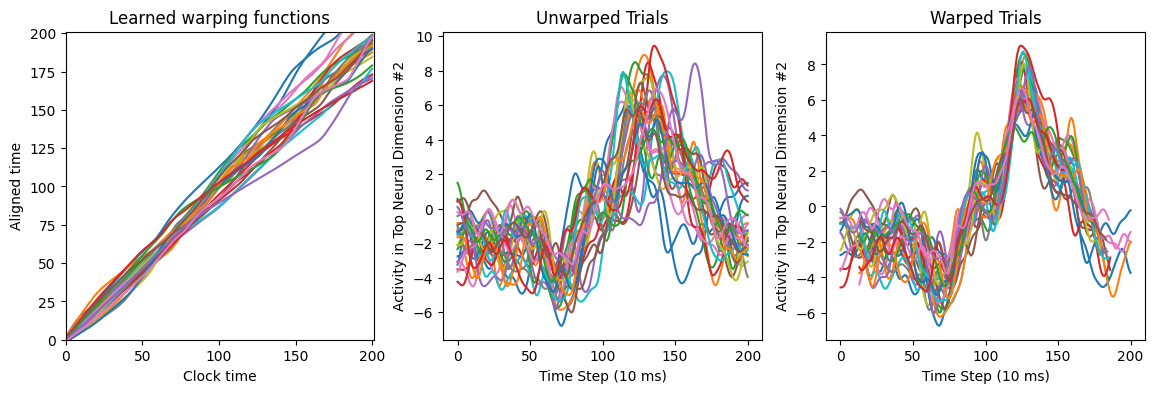

Warping character: r


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:03:33.576450: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_17/Assign' id:434622 op device:{requested: '', assigned: ''} def:{{{node tau_scale_17/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_17, tau_scale_17/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:04:08.371442: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_17/Ad

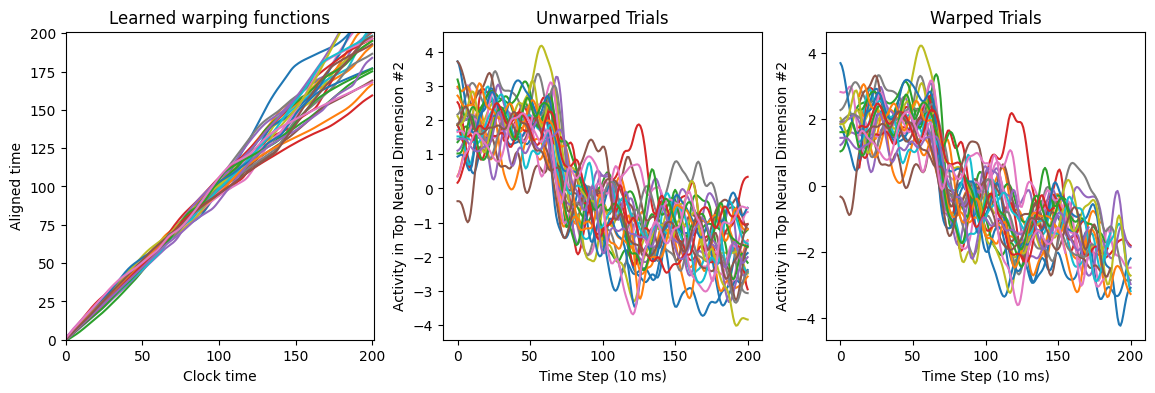

Warping character: s


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:13:09.372118: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_18/Assign' id:460646 op device:{requested: '', assigned: ''} def:{{{node tau_scale_18/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_18, tau_scale_18/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:13:44.345347: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_18/Ad

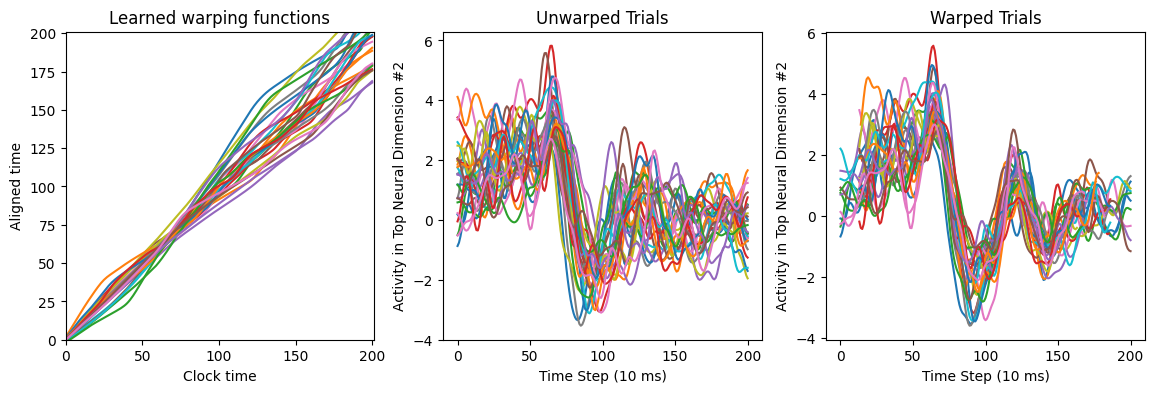

Warping character: t


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:14:48.791488: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_19/Assign' id:486721 op device:{requested: '', assigned: ''} def:{{{node tau_scale_19/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_19, tau_scale_19/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:15:21.780588: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_19/Ad

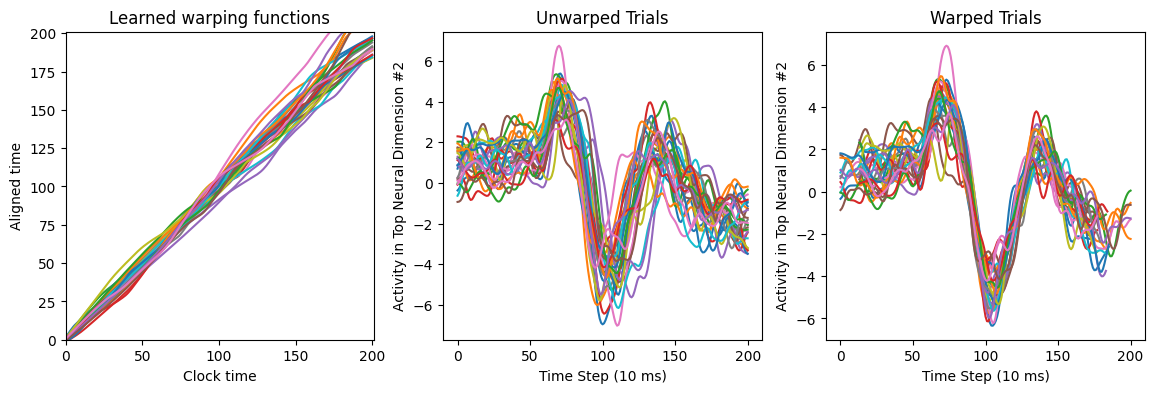

Warping character: u


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:16:28.876181: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_20/Assign' id:512847 op device:{requested: '', assigned: ''} def:{{{node tau_scale_20/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_20, tau_scale_20/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:17:04.656307: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_20/Ad

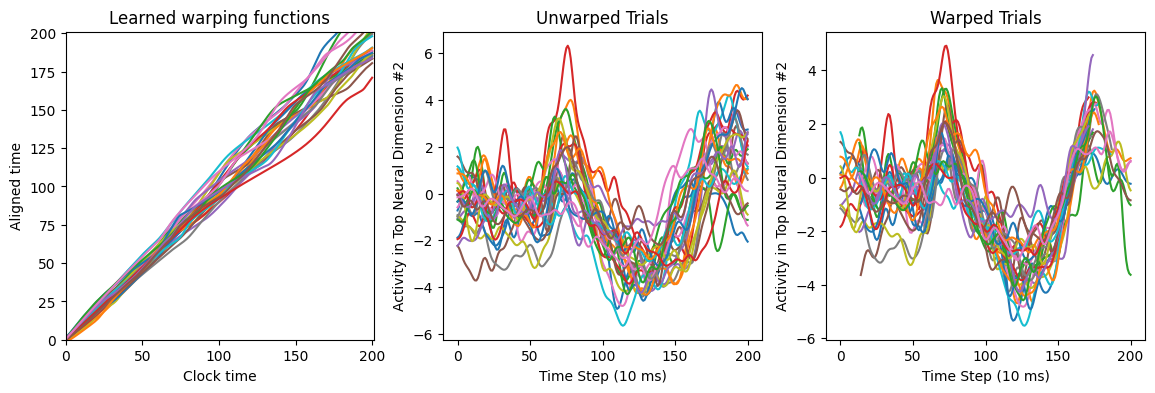

Warping character: v


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:18:15.696653: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_21/Assign' id:539024 op device:{requested: '', assigned: ''} def:{{{node tau_scale_21/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_21, tau_scale_21/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:18:53.233056: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_21/Ad

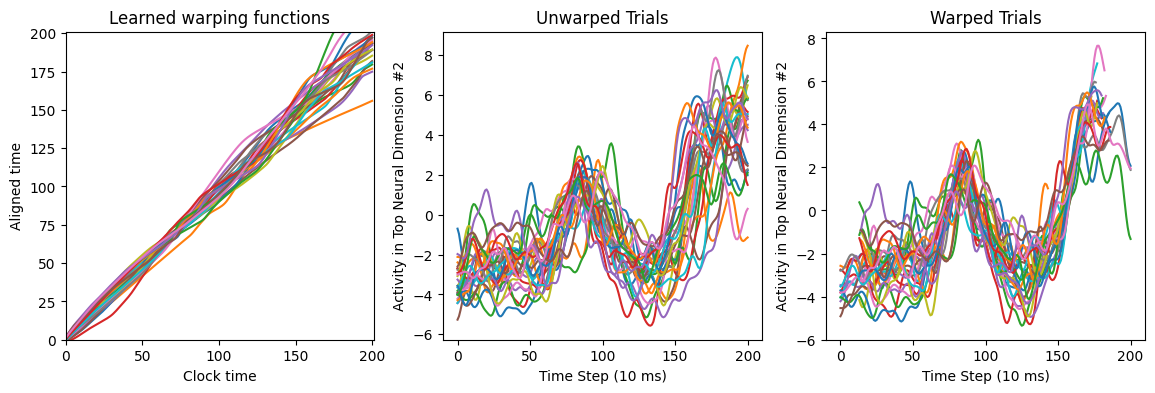

Warping character: w


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:20:07.740970: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_22/Assign' id:565252 op device:{requested: '', assigned: ''} def:{{{node tau_scale_22/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_22, tau_scale_22/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:20:46.889685: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_22/Ad

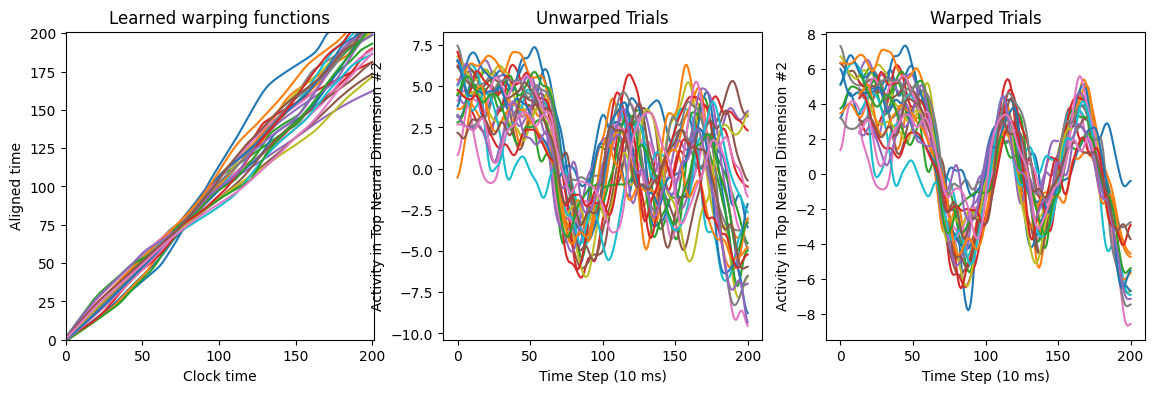

Warping character: x


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:22:09.279833: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_23/Assign' id:591531 op device:{requested: '', assigned: ''} def:{{{node tau_scale_23/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_23, tau_scale_23/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:22:54.458115: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_23/Ad

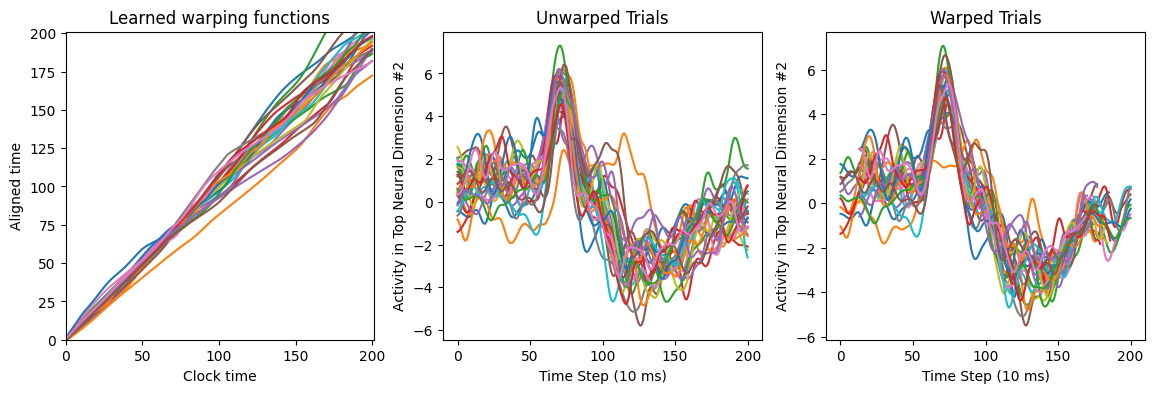

Warping character: y


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:24:21.010541: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_24/Assign' id:617861 op device:{requested: '', assigned: ''} def:{{{node tau_scale_24/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_24, tau_scale_24/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:25:07.691648: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_24/Ad

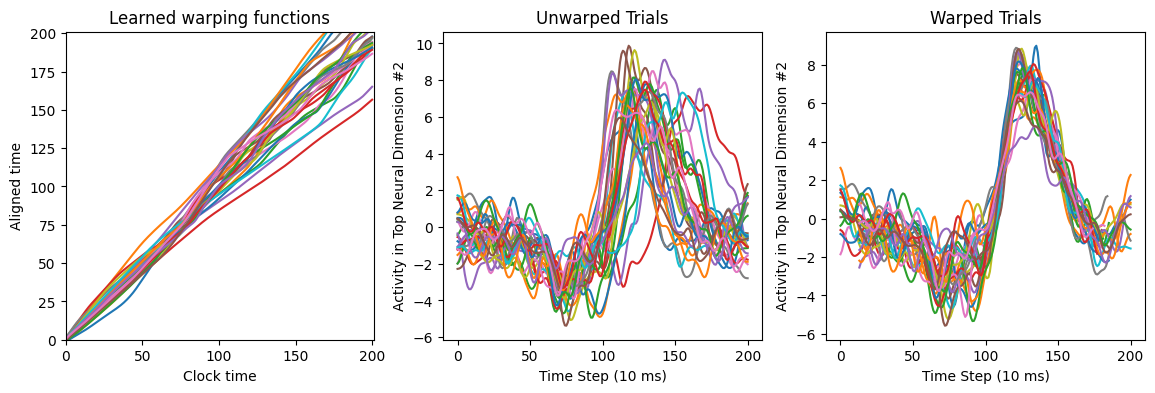

Warping character: z


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:26:36.280602: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_25/Assign' id:644242 op device:{requested: '', assigned: ''} def:{{{node tau_scale_25/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_25, tau_scale_25/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:27:26.887914: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_25/Ad

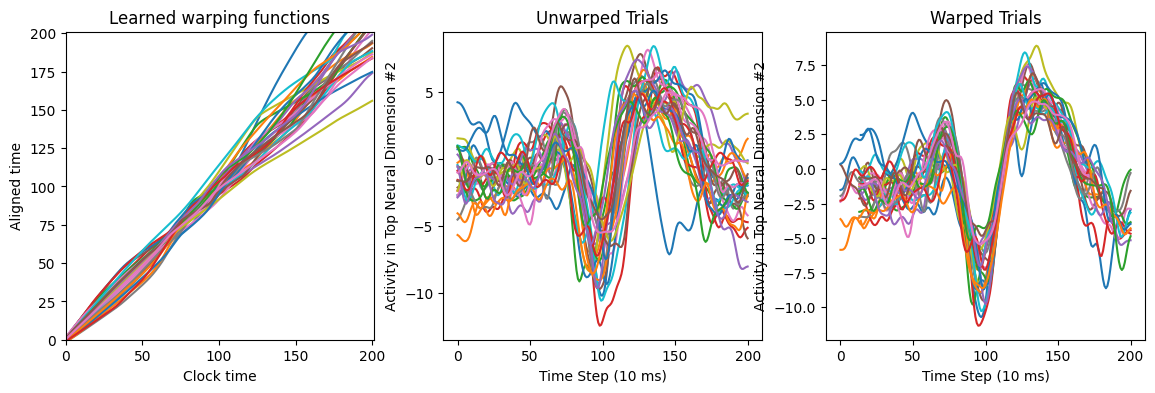

Warping character: greaterThan


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:28:58.684033: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_26/Assign' id:670674 op device:{requested: '', assigned: ''} def:{{{node tau_scale_26/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_26, tau_scale_26/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:29:51.613971: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_26/Ad

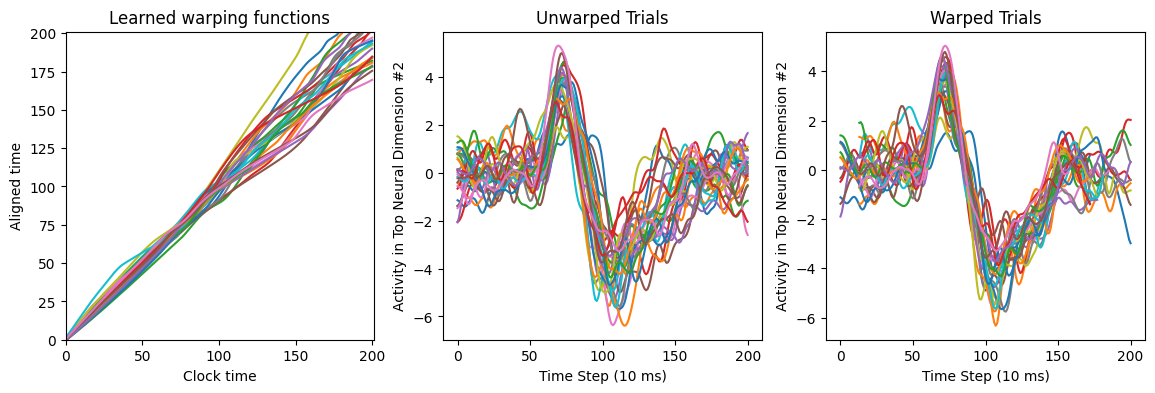

Warping character: comma


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:31:34.764775: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_27/Assign' id:697157 op device:{requested: '', assigned: ''} def:{{{node tau_scale_27/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_27, tau_scale_27/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:32:26.561618: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_27/Ad

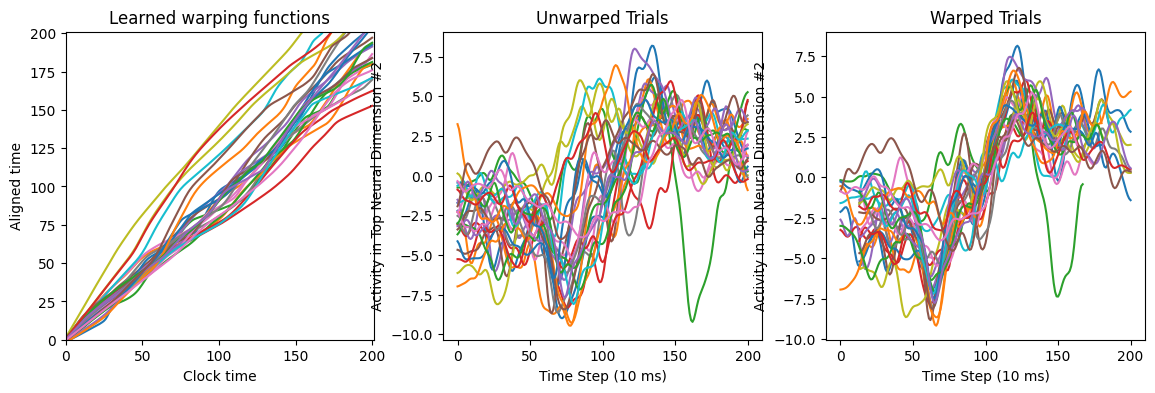

Warping character: apostrophe


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:34:06.448329: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_28/Assign' id:723691 op device:{requested: '', assigned: ''} def:{{{node tau_scale_28/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_28, tau_scale_28/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:35:05.368065: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_28/Ad

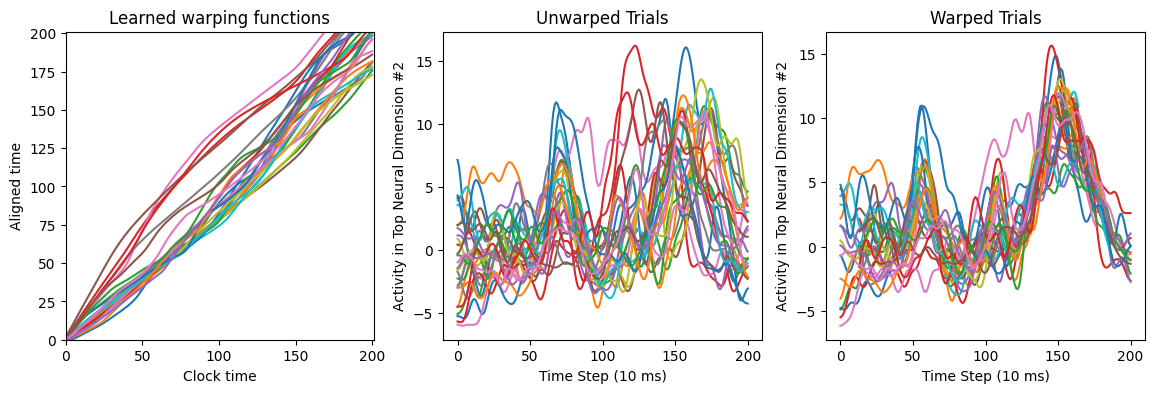

Warping character: tilde


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:36:48.514610: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_29/Assign' id:750276 op device:{requested: '', assigned: ''} def:{{{node tau_scale_29/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_29, tau_scale_29/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:37:43.514972: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_29/Ad

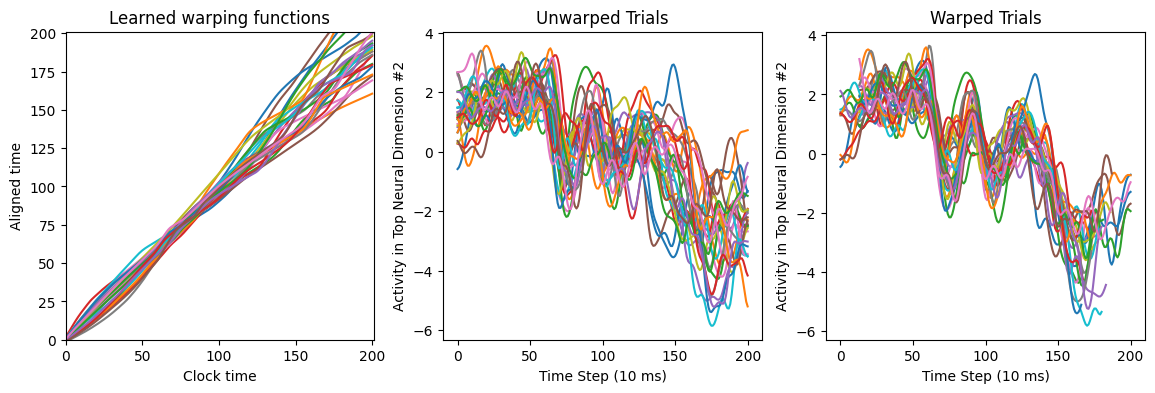

Warping character: questionMark


/var/folders/n_/8p1gdnb570j4m06ltsyf5d1w0000gn/T/ipykernel_38943/3457793677.py:55: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)
2025-06-26 18:39:31.011608: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_30/Assign' id:776912 op device:{requested: '', assigned: ''} def:{{{node tau_scale_30/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](tau_scale_30, tau_scale_30/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-26 18:40:32.420971: W tensorflow/c/c_api.cc:305] Operation '{name:'tau_scale_30/Ad

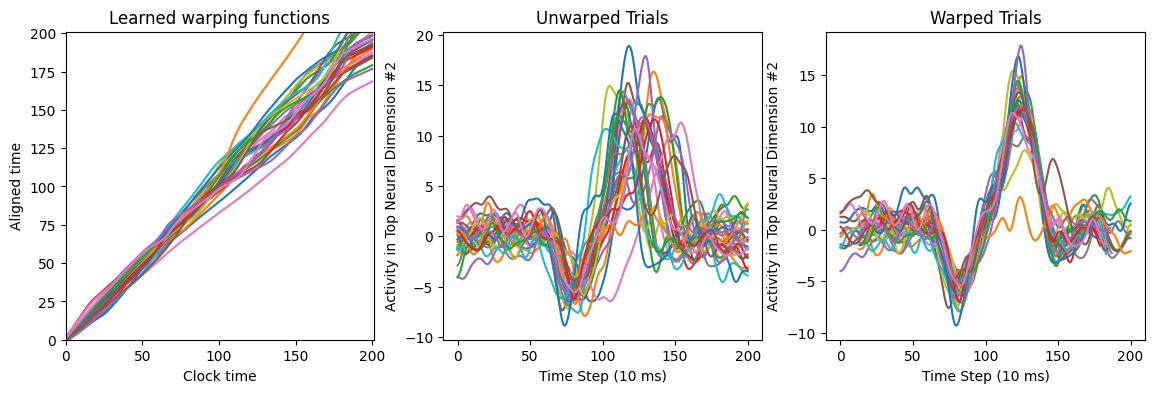

Saving /Users/seanmacpherson/clones/willets-2021-handwriting-bci/warped-data/_warpedCubes.mat


In [5]:
#Time-warp all singleLetters.mat files and save them to the Step1_TimeWarping folder
for dataDir in dataDirs:
    
    print('Warping dataset: ' + dataDir)
    #Because baseline firing rates drift over time, we normalize each electrode's firing rate by subtracting
    #its mean firing rate within each block of data (re-centering it). We also divide by each electrode's standard deviation 
    #to normalize the units.
    for idx, char in enumerate(charDef['charList']):
        orig_neural_cube = dat['neuralActivityCube_'+char].astype(np.float64).copy()
        neuralCube = dat['neuralActivityCube_'+char].astype(np.float64)

        #get the trials that belong to this character
        trlIdx = []
        for t in range(dat['characterCues'].shape[0]):
            if dat['characterCues'][t,0]==char:
                trlIdx.append(t)

        #get the block that each trial belonged to
        blockIdx = dat['blockNumsTimeSeries'][dat['goPeriodOnsetTimeBin'][trlIdx]]
        blockIdx = np.squeeze(blockIdx)

        #subtract block-specific means from each trial 
        for b in range(dat['blockList'].shape[0]):
            trialsFromThisBlock = np.squeeze(blockIdx==dat['blockList'][b])
            neuralCube[trialsFromThisBlock,:,:] -= dat['meansPerBlock'][np.newaxis,b,:]

        #divide by standard deviation to normalize the units
        neuralCube = neuralCube / dat['stdAcrossAllData'][np.newaxis,:,:]

        #replace the original cube with this newly normalized one
        dat['neuralActivityCube_'+char] = neuralCube
    
    alignedDat = {}

    #The following warps each character one at a time. 
    #(this is slow, and could be sped up significantly by warping multiple characters in parallel)
    for idx, char in enumerate(charDef['charList']):
        print('Warping character: ' + char)

        #Clears the previous character's graph
        # tf.reset_default_graph()

        #Number of factors used to denoise the data while time-warping (by approximating data with low-rank matrices)
        n_components = 5

        #Adds an L1 penalty on the second order finite difference of the warping functions.
        #This encourages the warping functions to be piecewise linear.
        warp_regularizer = curvature(scale=0.001, power=1)

        #Adds an L2 penatly on the second order finite difference of the temporal factors.
        #Encourages the temporal factors to be smooth in time.
        time_regularizer = curvature(scale=1.0, power=2, axis=0)

        # Smooths the binned spike counts before time-warping to denoise them (this step is key!)
        smoothed_spikes = scipy.ndimage.filters.gaussian_filter1d(dat['neuralActivityCube_'+char], 3.0, axis=1)

        # fit time-warping model
        model = TWPCA(smoothed_spikes, 
                      n_components, 
                      warp_regularizer=warp_regularizer, 
                      time_regularizer=time_regularizer).fit(progressbar=True)

        # use the model object to align data 
        estimated_aligned_data = model.transform(dat['neuralActivityCube_'+char])
        smoothed_aligned_data = scipy.ndimage.filters.gaussian_filter1d(estimated_aligned_data, 3.0, axis=1)

        #store aligned data and time-warping functions
        alignedDat[char] = estimated_aligned_data
        alignedDat[char+'_T'] = model.params['warp'].T.copy()

        #only make plots for the first session (otherwise the notebook gets too big)
        if dataDir!='t5.2019.05.08':
            continue

        #plot the warping functions to make sure they look reasonable (should be subtle deviations from the identity line)
        plt.figure(figsize=(14,4))
        plt.subplot(1,3,1)
        plt.plot(model.params['warp'].T, alpha=1);
        plt.axis('square')
        plt.xlabel('Clock time')
        plt.ylabel('Aligned time')
        plt.xlim(0, model.params['warp'].T.shape[0]);
        plt.ylim(0, model.params['warp'].T.shape[0])
        plt.title('Learned warping functions')
        
        #It's helpful also to visualize how the major dimensions in the data were aligned
        #We chose dimension 2 here, because the top dimension isn't as informative (it's just a large spike at movement onset)
        neuron_factors = model.params['neuron']
        plt.subplot(1,3,2)
        for t in range(estimated_aligned_data.shape[0]):
            thisTrialActivity = np.matmul(smoothed_spikes[t,:,:], neuron_factors)
            plt.plot(thisTrialActivity[:,1])

        plt.title('Unwarped Trials')
        plt.xlabel('Time Step (10 ms)')
        plt.ylabel('Activity in Top Neural Dimension #2')
        
        plt.subplot(1,3,3)
        for t in range(estimated_aligned_data.shape[0]):
            thisTrialWarpedActivity = np.matmul(smoothed_aligned_data[t,:,:], neuron_factors)
            plt.plot(thisTrialWarpedActivity[:,1])
        
        plt.title('Warped Trials')
        plt.xlabel('Time Step (10 ms)')
        plt.ylabel('Activity in Top Neural Dimension #2')
        
        plt.show()

    #save time-warped characters as a .mat file        
    fileName = rootDir + '/warped-data' + '/_warpedCubes.mat'
    print('Saving ' + fileName)
    scipy.io.savemat(fileName, alignedDat)

In [ ]:
np.isnan(np.matmul(smoothed_aligned_data[:,:,:], neuron_factors)).any(axis=1)

In [ ]:
display(char)
display(orig_neural_cube.shape)
display(dat['neuralActivityCube_'+"a"].shape)
display(estimated_aligned_data.shape)

# data: shape (27, 201, 192)
# warp_matrix: shape (27, 201)
inv_warp = invert_warp_indices(model.params['warp'], n_timepoints=201, shared_length=201)
manually_warped_data = warp_all_trials_numpy(dat['neuralActivityCube_'+"a"], inv_warp)

trial_idx = 0
electrode_idx = 19
raw_trial = orig_neural_cube[trial_idx, :, electrode_idx]
z_scored_trial = dat['neuralActivityCube_'+"a"][trial_idx, :, electrode_idx]
warped_trial = estimated_aligned_data[trial_idx, :, electrode_idx]
manually_warped_trial = manually_warped_data[trial_idx, :, electrode_idx]

# plt.plot(raw_trial, label="raw")
# plt.plot(z_scored_trial, label="raw-z-scored")
plt.plot(warped_trial, label="warped")
plt.plot(manually_warped_trial, label="manually-warped")
plt.legend()
plt.show()

In [ ]:
model.params['warp'].shape

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

def invert_warp_indices(warp_matrix, n_timepoints, shared_length):
    """Invert warp indices as done in twPCA to get de-jittering warp."""
    xs = np.arange(n_timepoints)
    xs_eval = np.arange(shared_length)
    new_warps = []
    for trial_warp in warp_matrix:
        f = interp1d(trial_warp, xs, bounds_error=False, fill_value=np.nan)
        new_warps.append(f(xs_eval))
    return np.array(new_warps, dtype=np.float32)  # shape: (n_trials, shared_length)

def warp_all_trials_numpy(data, inverse_warp_matrix):
    n_trials, n_timepoints, n_channels = data.shape
    shared_length = inverse_warp_matrix.shape[1]
    warped_data = np.zeros((n_trials, shared_length, n_channels), dtype=np.float32)

    for i in range(n_trials):
        for ch in range(n_channels):
            f_interp = interp1d(np.arange(n_timepoints), data[i, :, ch],
                                kind='linear', bounds_error=False, fill_value=np.nan)
            warped_data[i, :, ch] = f_interp(inverse_warp_matrix[i])
    
    return warped_data
